# First Worksheet

Welcome to the Image Understanding lab. Throughout this worksheet, you will apply some basic image manipulations.
First, we will make the necessary imports to do so.
For the following tasks, use only the imports provided.

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Task 1 Color channels:
a) Load the image lena.tif stored in the zip folder and display it.

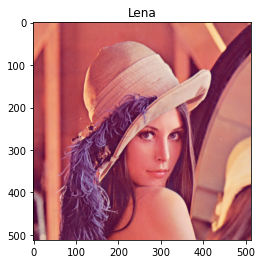

In [2]:
img = plt.imread('lena.tif')
_ = plt.imshow(img)
_ = plt.title('Lena')

b) Display the three color channels individually. Plot them in a plot one below the other. Use the subplots function from the pyplot library.

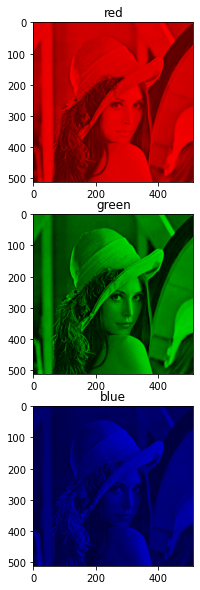

In [3]:
fig,ax = plt.subplots(3,1, figsize = (10,10))

title = ['red','green','blue']

for idx,a in enumerate(ax):
    tmp = np.zeros_like(img)
    tmp[:,:,idx] = img[:,:,idx]
    a.imshow(tmp)
    a.set_title(title[idx])

c) Swap the color channels and display the result

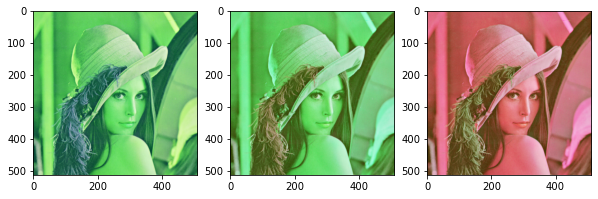

In [4]:
fig,ax = plt.subplots(1,3, figsize = (10,10))
ax[0].imshow(np.stack([img[:,:,1],img[:,:,0],img[:,:,2]], axis = -1))
ax[1].imshow(np.stack([img[:,:,2],img[:,:,0],img[:,:,1]], axis = -1))
ax[2].imshow(np.stack([img[:,:,0],img[:,:,2],img[:,:,1]], axis = -1))

d) Find a way to make the image lighter and darker. Show your results. Make sure that you stay in the value range between 0 and 255. You can use the np.clip function for this.

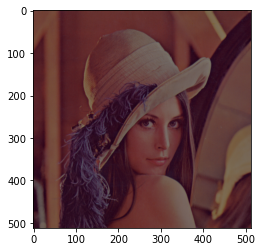

In [10]:
plt.imshow(np.array(np.clip(img * .5, 0 , 255),dtype = np.uint8))

e) Write a function gray_img which calculates a gray value image from an rgb image. It is sufficient if you return a single-channel image. Select cmap='gray' to display with plt.imshow.

(512, 512, 3)
(512, 512)


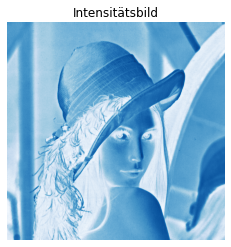

In [12]:
def gray_img(img):
    return img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3

plt.imshow(gray_img(img),cmap='Blues')
plt.title('Intensitätsbild')
plt.axis('off')

print(f"{img.shape}")

print(f"{gray_img(img).shape}")

f) Write a function calc_histogram which gets a color channel and calculates the corresponding histogram. Use your function to plot all three histograms. Plot the respective lines in the color of the color channel. Please provide the axes of your plot with meaningful axis labels.

In [7]:
def calc_histogram(ch):
    unique,counts = np.unique(ch, return_counts = True)
    values = dict(zip(unique,counts))
    return [values[i] if i in values else 0 for i in range(255)]

Text(0, 0.5, 'Häufigkeit')

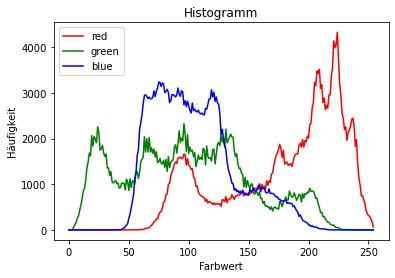

In [8]:
labels = ['red', 'green', 'blue']
colors = ['r','g','b']

for i in range(3):
    plt.plot(calc_histogram(img[:,:,i]), label = labels[i], color = colors[i])
    
plt.title('Histogramm')
plt.legend()
plt.xlabel('Farbwert')
plt.ylabel('Häufigkeit')


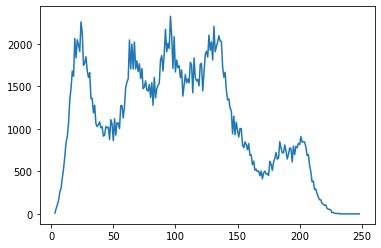

In [15]:
c,freq = np.unique(img[:,:,1], return_counts=True)
plt.plot(c,freq)

## Task 2, image manipulations
a) Write a function crop_img which cuts out a rectangle of size *width*, *height* at a position *center* and returns it. *Center* specifies the center of the image crop. Use your function to display an image section of size 100x100 in the center of the image.

In [9]:
def crop_img(img,center,width,height):
    return img[center[0] - int(height / 2) : center[0] + int(height / 2), center[1] - int(width/2): center[1] + int(width/2),:]

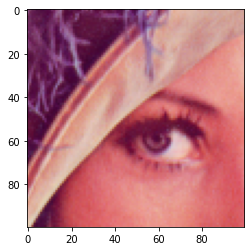

In [10]:
crop = crop_img(img,(int(img.shape[0]/2),int(img.shape[1]/2)),100,100)
plt.imshow(crop)